# InFinance Quant. Estratégia de Momentum 


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
import yahoofinancials as yf
from pprint import pprint
import mplfinance as mpf

from scipy import stats

from IPython import display

In [2]:
ticker = 'VALE3.SA'

start_date = '2020-03-08'
end_date =  '2021-03-08'

data = yf.YahooFinancials(ticker).get_historical_price_data(start_date, end_date, 'daily')


In [3]:
# Ler os dados do JSON
vale_raw = pd.DataFrame(data[ticker]['prices']).dropna()
# Converter a data para o tipo correto datetime
vale_raw['formatted_date'] = pd.to_datetime(vale_raw['formatted_date'])
# Indica a data como o índice de cada linha
vale_raw = vale_raw.set_index('formatted_date')
# Visualiza o resultado
vale_raw.head()

,date,high,low,open,close,volume,adjclose
formatted_date,,,,,,,
2020-03-09,1583758800,41.540001,37.810001,40.450001,37.830002,59037000.0,34.746456
2020-03-10,1583845200,45.340000,40.799999,41.900002,44.810001,63269800.0,41.157513
2020-03-11,1583931600,44.290001,39.000000,43.009998,40.740002,50025000.0,37.419262
2020-03-12,1584018000,36.000000,32.450001,36.000000,35.349998,62222000.0,32.468601
2020-03-13,1584104400,44.029999,37.000000,42.000000,42.900002,67635900.0,39.403198


In [4]:
vale3 = vale_raw.iloc[:,1:-1]
vale3.head()
vale3.close

formatted_date
2020-03-09     37.830002
2020-03-10     44.810001
2020-03-11     40.740002
2020-03-12     35.349998
2020-03-13     42.900002
                 ...    
2021-03-01     98.570000
2021-03-02    101.599998
2021-03-03    100.349998
2021-03-04     98.860001
2021-03-05    100.209999
Name: close, Length: 244, dtype: float64

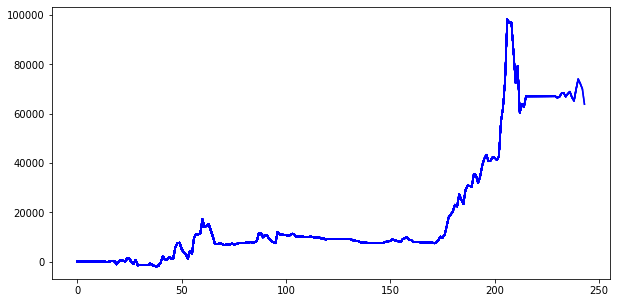

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,5));

cash = 0 # indica quanto dinheiro tem no bolso
position = 0 # indica a posição atual. 0 é zerado
result = [] # lista para montar o gráfico

fim = 0
momentum = 0
i = 0 

while i in range(len(vale3)):
    if i >= 10:
        momentum = vale3.open[i] - vale3.close[i-10]
        
    if momentum > 0:
        cash -= 100 * vale3.open[i] # Fluxo de caixa negativo
        position += 1 # Indica que está comprado

    if momentum < 0:
        cash = cash + 100 * vale3.open[i] * position
        position = 0
    
    result.append(cash + 100 * vale3.close[i] * position) # Mark To Market!
   
    # Fazendo o plot a cada iteração:
    ax.plot(result, color='blue')    
    display.clear_output(wait=True)
    display.display(fig)
    i += 1
    
ax.plot(result, color='blue');
display.clear_output(wait=True)